In [4]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np
from matplotlib import pyplot as plt

In [5]:
def classNameToLabel(className):
    return {
        'Loans': 0,
        'Credit card': 1,
        'Promotion Campaign': 2,
        'Account Balance': 3,
        'E-banking': 4,
        'FX': 5,
        'Mortgages': 6,
        'Insurance': 7,
        'Transfer Services': 8
    }[className]

In [6]:
df = pd.read_csv('dataset.csv')
df['Class'] = df['Class'].apply(classNameToLabel)

df.head()

,Class,Script
0,0,點樣決定貸款額
1,0,有咩唔同還款方式比我揀
2,0,借貸期啫係咩意思同埋幾長先適合
3,0,申請貸款要交啲咩文件
4,0,每個月平息係咩意思


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Script'], df['Class'], shuffle=True, stratify=df['Class'])

In [40]:
#Bert Layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_zh_preprocess/3") 
encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_zh_L-12_H-768_A-12/4",
    trainable=False)
    
encoder_inputs = preprocessor(text_input)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768].

output = tf.keras.layers.Dropout(0.1)(pooled_output)
# x = tf.keras.layers.Dense(128, activation='relu')(pooled_output)
output = tf.keras.layers.Dense(9, activation='softmax')(output)

model = tf.keras.Model(inputs=text_input, outputs=output)

In [41]:

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [42]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=150)

Epoch 1/150
5/5 [==============================] - 77s 14s/step - loss: 2.7991 - accuracy: 0.0850 - val_loss: 2.2562 - val_accuracy: 0.1373
Epoch 2/150
5/5 [==============================] - 62s 13s/step - loss: 2.3659 - accuracy: 0.1503 - val_loss: 2.3200 - val_accuracy: 0.1765
Epoch 3/150
5/5 [==============================] - 61s 13s/step - loss: 2.3141 - accuracy: 0.1569 - val_loss: 2.2033 - val_accuracy: 0.2353
Epoch 4/150
5/5 [==============================] - 63s 13s/step - loss: 2.2006 - accuracy: 0.2026 - val_loss: 2.1228 - val_accuracy: 0.1765
Epoch 5/150
5/5 [==============================] - 65s 14s/step - loss: 2.1224 - accuracy: 0.2026 - val_loss: 2.0931 - val_accuracy: 0.2549
Epoch 6/150
5/5 [==============================] - 62s 13s/step - loss: 2.0297 - accuracy: 0.2614 - val_loss: 2.0611 - val_accuracy: 0.1765
Epoch 7/150
5/5 [==============================] - 62s 13s/step - loss: 2.0346 - accuracy: 0.2157 - val_loss: 2.0273 - val_accuracy: 0.2157
Epoch 8/150
5/5 [===

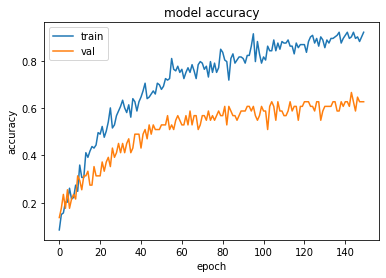

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [45]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2) 

print('\nTest accuracy:', test_acc)

2/2 - 15s - loss: 1.2621 - accuracy: 0.6275 - 15s/epoch - 8s/step

Test accuracy: 0.6274510025978088


In [19]:
model.save('nlp.h5')